# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer

# Load Data

In [2]:
path_holidays = '../data/store_sales/holidays_events.csv'
path_oil = '../data/store_sales/oil.csv'
path_stores = '../data/store_sales/stores.csv'
path_train = '../data/store_sales/train.csv'
path_transactions = '../data/store_sales/transactions.csv'

In [3]:
df_hollidays = pd.read_csv(path_holidays)
df_hollidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
df_oil = pd.read_csv(path_oil)
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
df_stores = pd.read_csv(path_stores)
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
df_train = pd.read_csv(path_train, index_col=0)
df_train.head()

/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,2013-01-01,1,BABY CARE,0.0,0.0
2,2013-01-01,1,BEAUTY,0.0,0.0
3,2013-01-01,1,BEVERAGES,0.0,0.0
4,2013-01-01,1,BOOKS,0.0,0.0


In [7]:
df_train.tail()

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000883,2017-08-15,9,POULTRY,438.133,15.0
3000884,2017-08-15,9,PREPARED FOODS,154.553,8.0
3000885,2017-08-15,9,PRODUCE,2419.729,148.0
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,10.0
3000887,2017-08-15,9,SEAFOOD,16.000,2.0


In [8]:
df_transactions = pd.read_csv(path_transactions)
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


# Data Explo

## generality

In [9]:
dataframes = [df_hollidays, df_oil, df_stores, df_train, df_transactions]
dataframes_name = ['df_hollidays', 'df_oil', 'df_stores', 'df_train', 'df_transactions']
for index, dataframe in enumerate(dataframes) :
    print(f'shapes {dataframes_name[index]} {dataframe.shape}')
    print(f'isnull_number {dataframes_name[index]} {dataframe.isnull().sum()}' )
    print('_____________')

shapes df_hollidays (350, 6)
isnull_number df_hollidays date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
_____________
shapes df_oil (1218, 2)
isnull_number df_oil date           0
dcoilwtico    43
dtype: int64
_____________
shapes df_stores (54, 5)
isnull_number df_stores store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
_____________
shapes df_train (3000888, 5)
isnull_number df_train date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
_____________
shapes df_transactions (83488, 3)
isnull_number df_transactions date            0
store_nbr       0
transactions    0
dtype: int64
_____________


## train_df

In [10]:
df_train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [11]:
df_train['onpromotion'].nunique()

991

/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='onpromotion'>

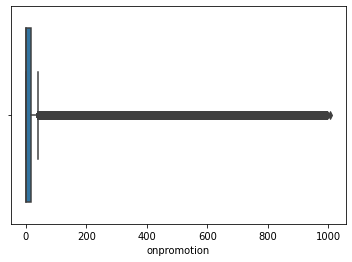

In [12]:
sns.boxplot(df_train['onpromotion'])


/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

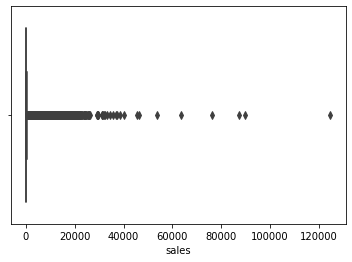

In [13]:
sns.boxplot(df_train['sales'])

<AxesSubplot:xlabel='sales', ylabel='Count'>

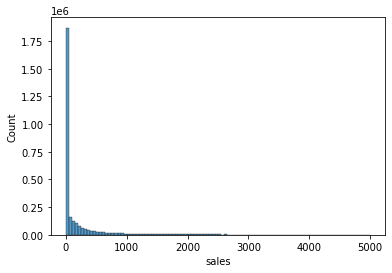

In [14]:
a = df_train[df_train['sales'] <5000]
sns.histplot(a['sales'], bins=100)

## oil_df

<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

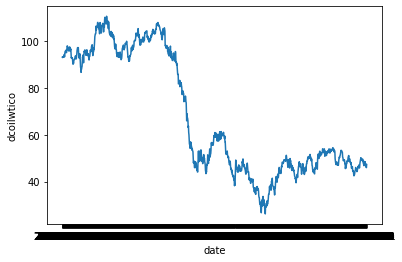

In [15]:
sns.lineplot(x=df_oil['date'], y = df_oil['dcoilwtico'])

# Data preprocess

## Oil_df

In [16]:
missing_date = []
for date in df_train['date'].unique() :
    if date not in df_oil['date'].unique() :
        missing_date.append(date)
len(missing_date)

481

In [17]:
missing_date_df = pd.DataFrame(missing_date, columns=['date'])
missing_date_df['dcoilwtico'] = np.nan
missing_date_df

,date,dcoilwtico
0,2013-01-05,NaN
1,2013-01-06,NaN
2,2013-01-12,NaN
3,2013-01-13,NaN
4,2013-01-19,NaN
...,...,...
476,2017-07-30,NaN
477,2017-08-05,NaN
478,2017-08-06,NaN
479,2017-08-12,NaN


In [19]:
df_oil = pd.concat([df_oil, missing_date_df])
df_oil.shape

(1699, 2)

In [20]:
df_oil.sort_values(by='date', inplace=True)
df_oil.reset_index(drop=True, inplace=True)

In [22]:
df_oil = df_oil.interpolate(method ='linear', limit_direction ='both')
df_oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

## merging df in a big dataframe

In [23]:
data = pd.merge(df_train, df_oil, how='left', on='date' )

In [67]:
data.tail(30)

,date,store_nbr,family,sales,onpromotion,dcoilwtico
3000858,2017-08-15,9,BEVERAGES,3530.000,341.0,47.57
3000859,2017-08-15,9,BOOKS,0.000,0.0,47.57
3000860,2017-08-15,9,BREAD/BAKERY,528.000,71.0,47.57
3000861,2017-08-15,9,CELEBRATION,16.000,8.0,47.57
3000862,2017-08-15,9,CLEANING,1439.000,273.0,47.57
3000863,2017-08-15,9,DAIRY,835.000,148.0,47.57
3000864,2017-08-15,9,DELI,551.713,63.0,47.57
3000865,2017-08-15,9,EGGS,244.000,19.0,47.57
3000866,2017-08-15,9,FROZEN FOODS,133.738,14.0,47.57
3000867,2017-08-15,9,GROCERY I,6630.383,780.0,47.57


In [62]:
stores = data['store_nbr'].unique()
dates = data['date'].unique()

In [63]:
new=[]
for store in stores :
    store_ = []
    data_ = data[data['store_nbr']==store]
    for date in dates :
        column = data_['sales'][data_['date']==date]
        store_.append(column)
    new.append(store_)

In [65]:
new = np.array(new)
new.shape

(54, 1684, 33)

'2013-01-02'